<h3>Import Libraries and Load Dataset</h3>

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [20]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
heart_df=pd.read_csv("/content/UCIheartdisease.csv")

<h3>Data Pre-Processing</h3>

In [9]:
heart_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1


In [10]:
heart_df.shape

(303, 14)

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<h3>Graphical Analysis</h3>

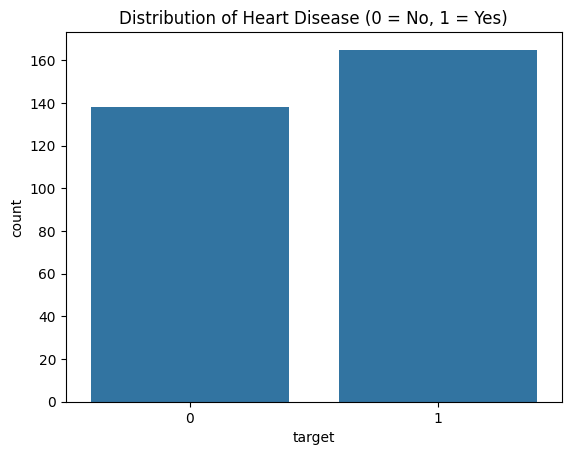

In [ ]:
sns.countplot(x='target', data=heart_df)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

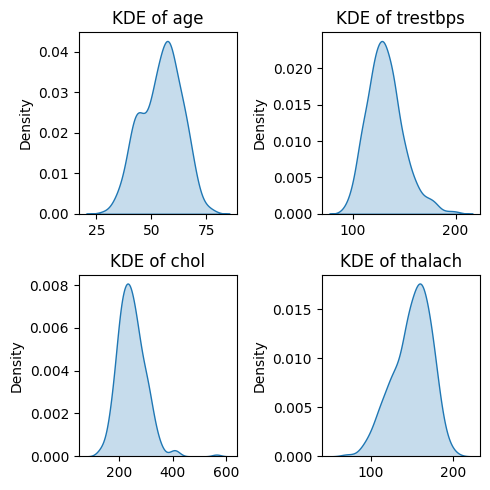

In [ ]:
cols = ['age', 'trestbps', 'chol', 'thalach']
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.kdeplot(data=heart_df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

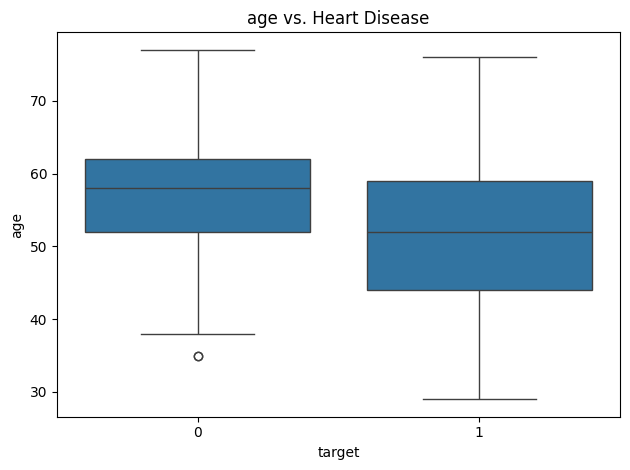

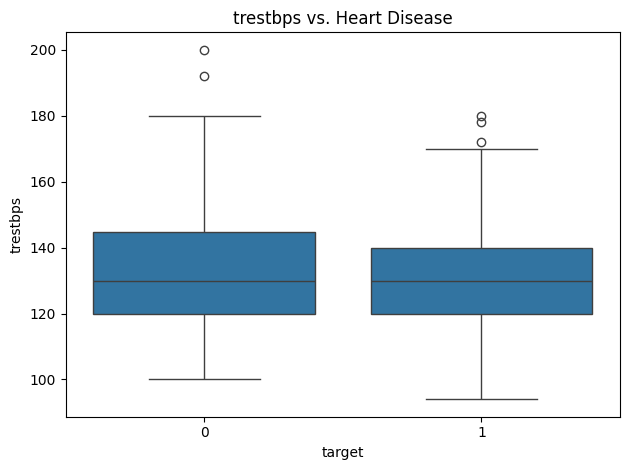

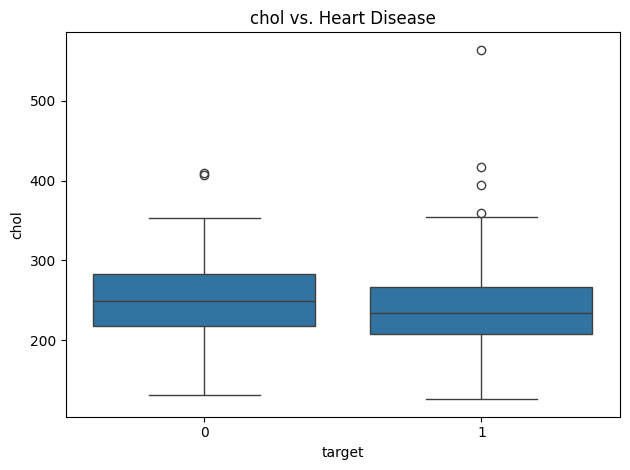

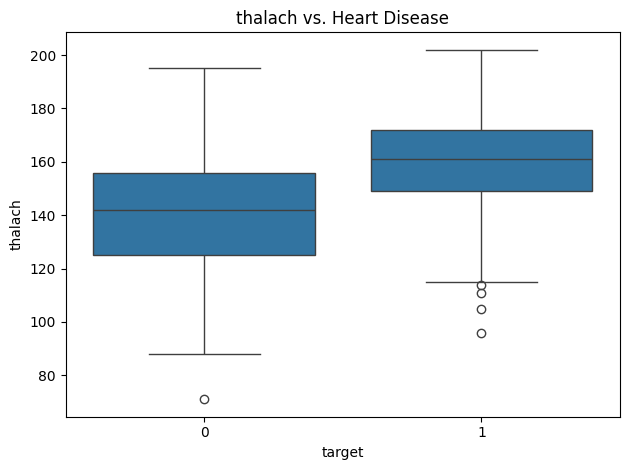

In [ ]:
for col in ['age', 'trestbps', 'chol', 'thalach']:
    sns.boxplot(x='target', y=col, data=heart_df)
    plt.title(f'{col} vs. Heart Disease')
    plt.tight_layout()
    plt.show()

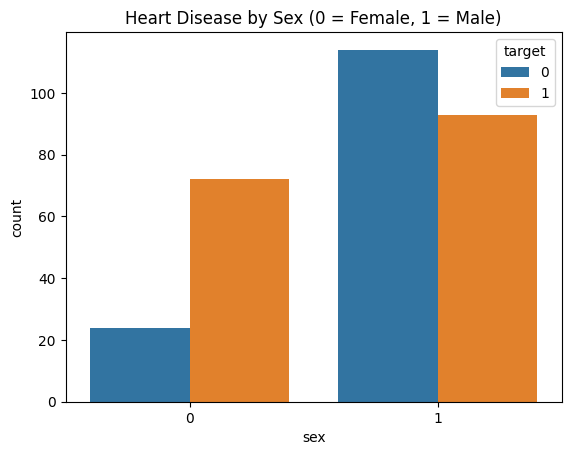

In [ ]:
sns.countplot(x='sex', hue='target', data=heart_df)
plt.title('Heart Disease by Sex (0 = Female, 1 = Male)')
plt.show()

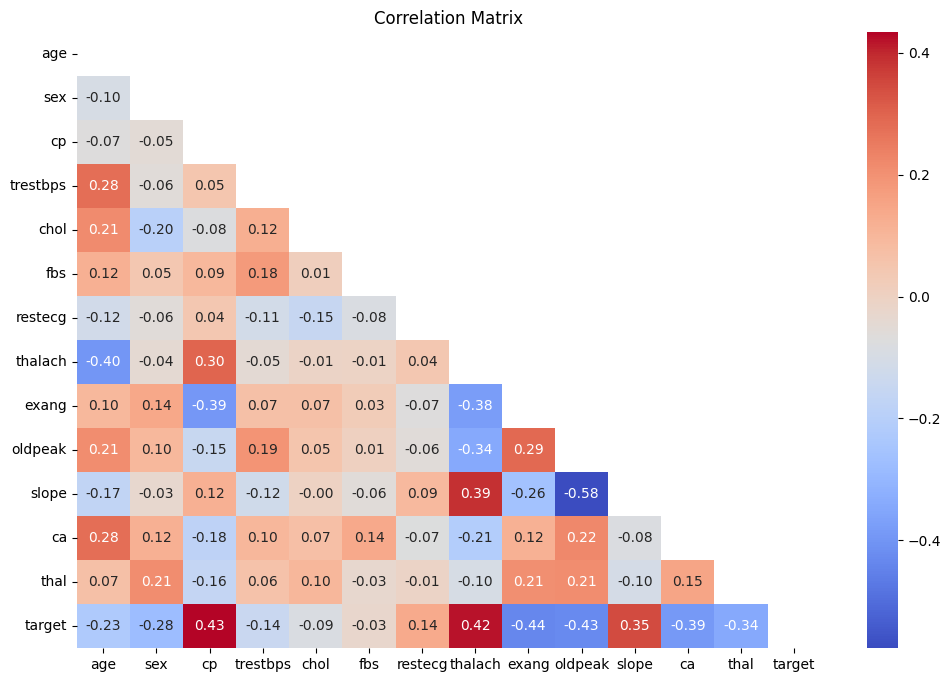

In [ ]:
corr_matrix=heart_df.corr()
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)
plt.title('Correlation Matrix')
plt.show()

<h3>Data Split and Model Implementation</h3>

In [12]:
X = heart_df.drop(columns='target', axis=1)
y = heart_df['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
def evaluate_model(model, x_train, x_test, y_train, y_test):


    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Blues", fmt='.4g', ax=ax[0])
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Blues", fmt='.4g', ax=ax[1])
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())

    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    model_score = pd.DataFrame(score, index=['precision_train', 'precision_test', 'recall_train', 'recall_test', 'acc_train', 'acc_test', 'F1_train', 'F1_test'], columns=['Score'])
    return model_score

<h4>Logistic Regression</h4>


Confusion Matrix:


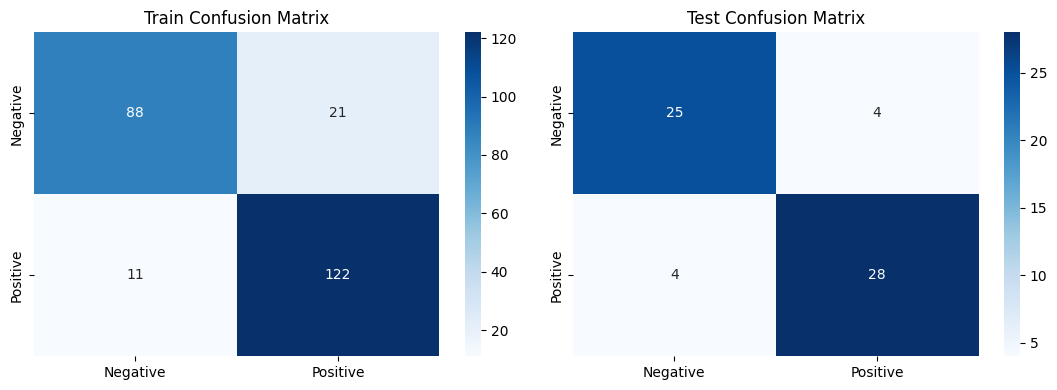


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.888889 | 0.807339 |   0.846154 | 109        |
| 1            |    0.853147 | 0.917293 |   0.884058 | 133        |
| accuracy     |    0.867769 | 0.867769 |   0.867769 |   0.867769 |
| macro avg    |    0.871018 | 0.862316 |   0.865106 | 242        |
| weighted avg |    0.869246 | 0.867769 |   0.866985 | 242        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.862069 | 0.862069 |   0.862069 | 29        |
| 1            |    0.875    | 0.875    |   0.875    | 32        |
| accuracy     |    0.868852 | 0.868852 |   0.868852 |  0.868852 |
| macro avg    |    0.868534 | 0.868534 |   0.868534 | 61        |
| weighted avg |    0.868852 | 0.868852 |   0.868852 | 61      

In [79]:
lor=LogisticRegression(max_iter=1000)
lor_scores=evaluate_model(lor, X_train, X_test, y_train, y_test)

In [80]:
lor_scores

,Score
precision_train,0.869246
precision_test,0.868852
recall_train,0.867769
recall_test,0.868852
acc_train,0.867769
acc_test,0.868852
F1_train,0.866985
F1_test,0.868852


<h4>Hyperparameter Tuning & Cross Validation</h4>

In [29]:
params_lor={'C': [100,10,1,0.1,0.01,0.001,0.0001],
        'penalty': ['l1', 'l2','elasticnet'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid=GridSearchCV(lor, param_grid=params, cv=5)
grid.fit(X_train, y_train)

best_params=grid.best_params_
print("Best Paramerters :" ,best_params)

Best Paramerters : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


<h4>M2 - Logreg</h4>

In [30]:
lor_m2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=1000, random_state=42)


Confusion Matrix:


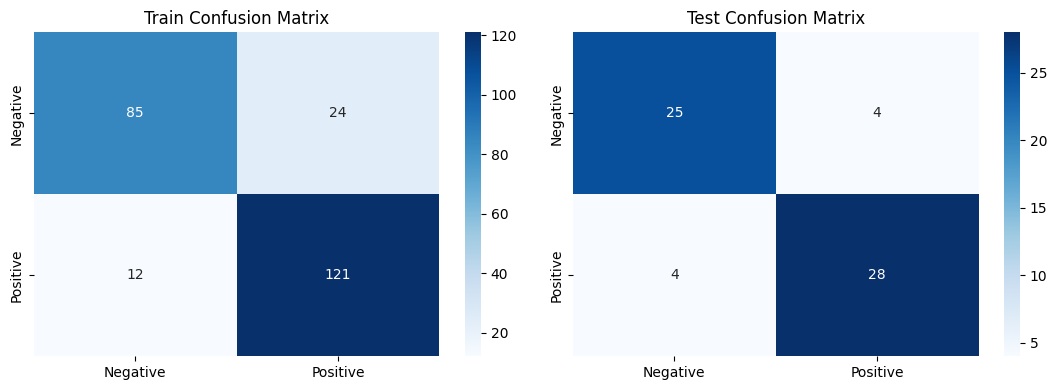


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.876289 | 0.779817 |   0.825243 | 109       |
| 1            |    0.834483 | 0.909774 |   0.870504 | 133       |
| accuracy     |    0.85124  | 0.85124  |   0.85124  |   0.85124 |
| macro avg    |    0.855386 | 0.844795 |   0.847873 | 242       |
| weighted avg |    0.853313 | 0.85124  |   0.850117 | 242       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.862069 | 0.862069 |   0.862069 | 29        |
| 1            |    0.875    | 0.875    |   0.875    | 32        |
| accuracy     |    0.868852 | 0.868852 |   0.868852 |  0.868852 |
| macro avg    |    0.868534 | 0.868534 |   0.868534 | 61        |
| weighted avg |    0.868852 | 0.868852 |   0.868852 | 61        |


In [81]:
lor_m2_scores=evaluate_model(lor_m2, X_train, X_test, y_train, y_test)

In [82]:
lor_m2_scores

,Score
precision_train,0.853313
precision_test,0.868852
recall_train,0.851240
recall_test,0.868852
acc_train,0.851240
acc_test,0.868852
F1_train,0.850117
F1_test,0.868852


<h4>Decision Trees</h4>


Confusion Matrix:


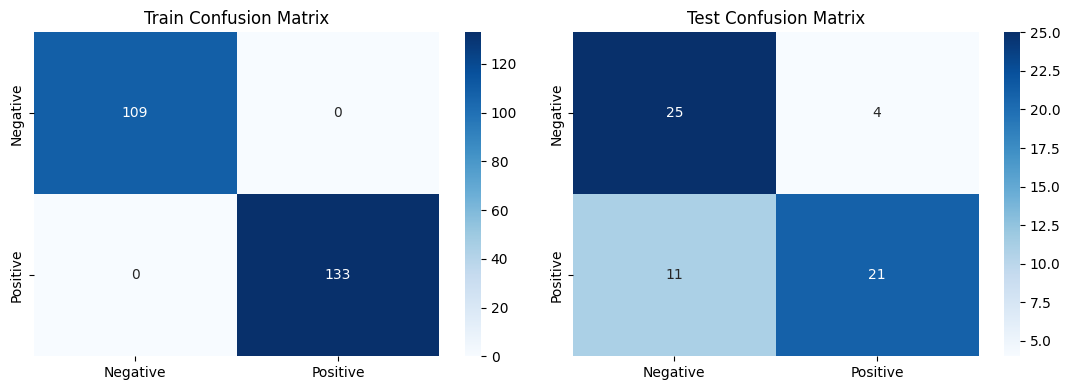


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |       109 |
| 1            |           1 |        1 |          1 |       133 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       242 |
| weighted avg |           1 |        1 |          1 |       242 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.694444 | 0.862069 |   0.769231 | 29        |
| 1            |    0.84     | 0.65625  |   0.736842 | 32        |
| accuracy     |    0.754098 | 0.754098 |   0.754098 |  0.754098 |
| macro avg    |    0.767222 | 0.759159 |   0.753036 | 61        |
| weighted avg |    0.770801 | 0.754098 |   0.75224  | 61        |


In [83]:
dtc=DecisionTreeClassifier(random_state=42)
dtc_scores=evaluate_model(dtc, X_train, X_test, y_train, y_test)

In [84]:
dtc_scores

,Score
precision_train,1.000000
precision_test,0.770801
recall_train,1.000000
recall_test,0.754098
acc_train,1.000000
acc_test,0.754098
F1_train,1.000000
F1_test,0.752240


<h4>Hyperparameter Tuning & Cross Validation</h4>

In [33]:
params_dt={'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20),
        'criterion':['gini', 'entropy']}

grid=GridSearchCV(dtc, param_grid=params_dt, cv=5)
grid.fit(X_train, y_train)

best_params=grid.best_params_
print("Best Paramerters :" ,best_params)

Best Paramerters : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': np.int64(11), 'min_samples_split': np.int64(2)}


<h4>M2 - DT</h4>

In [35]:
dtc_m2=DecisionTreeClassifier(random_state=42,
                              max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              criterion=best_params['criterion'])


Confusion Matrix:


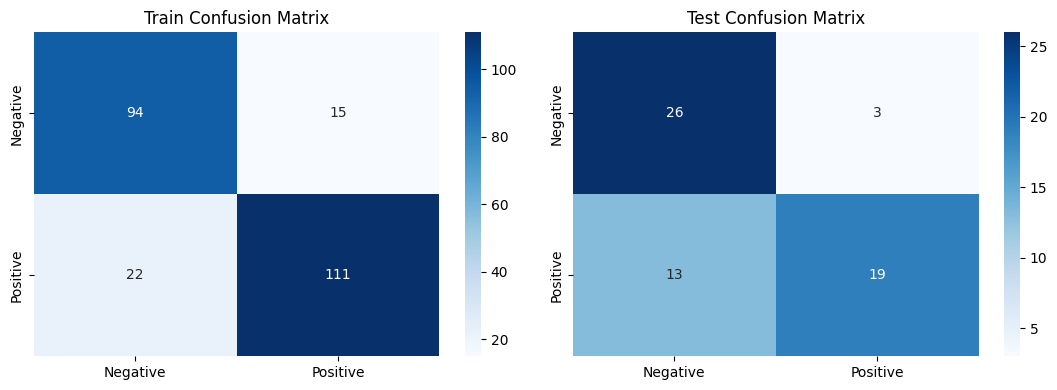


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.810345 | 0.862385 |   0.835556 | 109        |
| 1            |    0.880952 | 0.834586 |   0.857143 | 133        |
| accuracy     |    0.847107 | 0.847107 |   0.847107 |   0.847107 |
| macro avg    |    0.845649 | 0.848486 |   0.846349 | 242        |
| weighted avg |    0.84915  | 0.847107 |   0.84742  | 242        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.666667 | 0.896552 |   0.764706 | 29        |
| 1            |    0.863636 | 0.59375  |   0.703704 | 32        |
| accuracy     |    0.737705 | 0.737705 |   0.737705 |  0.737705 |
| macro avg    |    0.765152 | 0.745151 |   0.734205 | 61        |
| weighted avg |    0.769995 | 0.737705 |   0.732705 | 61      

In [85]:
dtc_m2_scores=evaluate_model(dtc_m2, X_train, X_test, y_train, y_test)

In [86]:
dtc_m2_scores

,Score
precision_train,0.849150
precision_test,0.769995
recall_train,0.847107
recall_test,0.737705
acc_train,0.847107
acc_test,0.737705
F1_train,0.847420
F1_test,0.732705


<h4>Random Forest</h4>


Confusion Matrix:


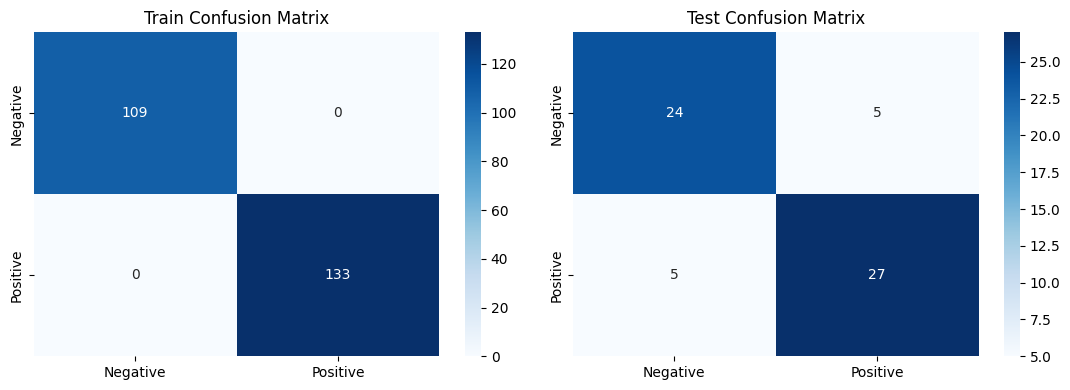


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |       109 |
| 1            |           1 |        1 |          1 |       133 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       242 |
| weighted avg |           1 |        1 |          1 |       242 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.827586 | 0.827586 |   0.827586 | 29        |
| 1            |    0.84375  | 0.84375  |   0.84375  | 32        |
| accuracy     |    0.836066 | 0.836066 |   0.836066 |  0.836066 |
| macro avg    |    0.835668 | 0.835668 |   0.835668 | 61        |
| weighted avg |    0.836066 | 0.836066 |   0.836066 | 61        |


In [87]:
rfc=RandomForestClassifier(random_state=42)
rfc_scores=evaluate_model(rfc, X_train, X_test, y_train, y_test)

In [88]:
rfc_scores

,Score
precision_train,1.000000
precision_test,0.836066
recall_train,1.000000
recall_test,0.836066
acc_train,1.000000
acc_test,0.836066
F1_train,1.000000
F1_test,0.836066


<h4>Hyperparameter Tuning & Cross Validation</h4>

In [40]:
params_rf={'n_estimators': [10, 50, 100, 200],
           'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
           'min_samples_split': [2, 3, 4, 5],
           'criterion':['gini','entropy']}

random_search = RandomizedSearchCV(rfc, param_distributions=params_rf, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 11, 'criterion': 'entropy'}


<h4>M2 - RF</h4>

In [89]:
rfc_m2=RandomForestClassifier(random_state=42,
                              n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              criterion=best_params['criterion'])


Confusion Matrix:


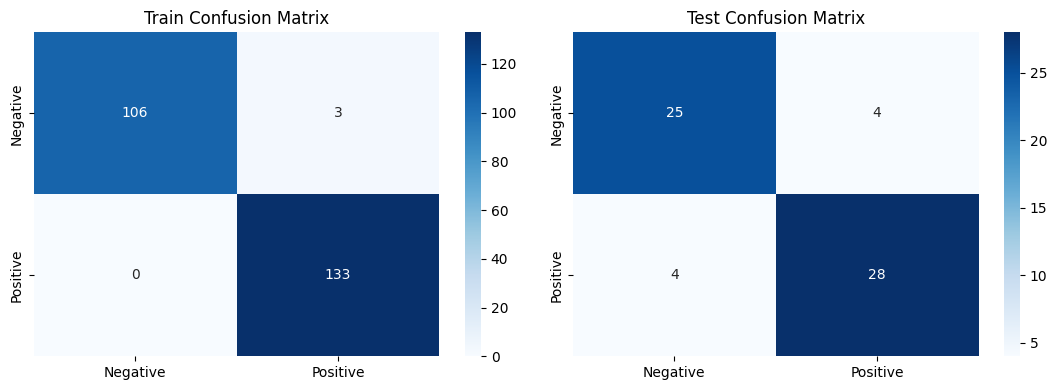


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 0.972477 |   0.986047 | 109        |
| 1            |    0.977941 | 1        |   0.988848 | 133        |
| accuracy     |    0.987603 | 0.987603 |   0.987603 |   0.987603 |
| macro avg    |    0.988971 | 0.986239 |   0.987447 | 242        |
| weighted avg |    0.987877 | 0.987603 |   0.987586 | 242        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.862069 | 0.862069 |   0.862069 | 29        |
| 1            |    0.875    | 0.875    |   0.875    | 32        |
| accuracy     |    0.868852 | 0.868852 |   0.868852 |  0.868852 |
| macro avg    |    0.868534 | 0.868534 |   0.868534 | 61        |
| weighted avg |    0.868852 | 0.868852 |   0.868852 | 61      

In [90]:
rfc_m2_scores=evaluate_model(rfc_m2, X_train, X_test, y_train, y_test)

In [91]:
rfc_m2_scores

,Score
precision_train,0.987877
precision_test,0.868852
recall_train,0.987603
recall_test,0.868852
acc_train,0.987603
acc_test,0.868852
F1_train,0.987586
F1_test,0.868852


<h4>Model comparison on Basis of metric scores</h4>

In [92]:
total_scores=pd.concat([lor_scores,lor_m2_scores,dtc_scores,dtc_m2_scores,rfc_scores,rfc_m2_scores], axis=1)
model_scores=pd.DataFrame(total_scores)
model_scores.columns=['lor','lor_m2','dtc','dtc_m2','rfc','rfc_m2']
model_scores=model_scores.T
model_scores

,precision_train,precision_test,recall_train,recall_test,acc_train,acc_test,F1_train,F1_test
lor,0.869246,0.868852,0.867769,0.868852,0.867769,0.868852,0.866985,0.868852
lor_m2,0.853313,0.868852,0.851240,0.868852,0.851240,0.868852,0.850117,0.868852
dtc,1.000000,0.770801,1.000000,0.754098,1.000000,0.754098,1.000000,0.752240
dtc_m2,0.849150,0.769995,0.847107,0.737705,0.847107,0.737705,0.847420,0.732705
rfc,1.000000,0.836066,1.000000,0.836066,1.000000,0.836066,1.000000,0.836066
rfc_m2,0.987877,0.868852,0.987603,0.868852,0.987603,0.868852,0.987586,0.868852


In [93]:
def select_best_model(df, metrics=['precision_test', 'recall_test', 'acc_test', 'F1_test'], weights=None):
  if weights is None:
        weights = [1] * len(metrics)

  weights = [w / sum(weights) for w in weights]
  df['score'] = df[metrics].multiply(weights).sum(axis=1)
  best_model = df['score'].idxmax()

  return best_model, df['score'].max()

In [94]:
weights = [1, 3, 1, 2]
best_model=select_best_model(model_scores,weights=weights)
print("Best Model:", best_model)

Best Model: ('lor', 0.8688524590163933)


<h4>Prediction</h4>

In [53]:
feature_names=X.columns
def predict(model,feature_names):
  user_input = {}
  for feature in feature_names:
    user_input[feature] = [float(input(f"Enter value for '{feature}': "))]

  user_df = pd.DataFrame(user_input)

  prediction = model.predict(user_df)

  print("\n--- Prediction Result ---")
  if (prediction[0]== 0):
    print('The Person does not have a Heart Disease')
  else:
    print('The Person has Heart Disease')
  return prediction


In [55]:
heart_df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [56]:
predict(rfc_m2,feature_names)

Enter value for 'age': 63
Enter value for 'sex': 1
Enter value for 'cp': 3
Enter value for 'trestbps': 145
Enter value for 'chol': 233
Enter value for 'fbs': 1
Enter value for 'restecg': 0
Enter value for 'thalach': 150
Enter value for 'exang': 0
Enter value for 'oldpeak': 2.3
Enter value for 'slope': 0
Enter value for 'ca': 0
Enter value for 'thal': 1

--- Prediction Result ---
The Person has Heart Disease


array([1])

In [57]:
predict(lor_m2,feature_names)

Enter value for 'age': 37
Enter value for 'sex': 1
Enter value for 'cp': 2
Enter value for 'trestbps': 130
Enter value for 'chol': 250
Enter value for 'fbs': 0
Enter value for 'restecg': 1
Enter value for 'thalach': 187
Enter value for 'exang': 0
Enter value for 'oldpeak': 3.5
Enter value for 'slope': 0
Enter value for 'ca': 0
Enter value for 'thal': 2

--- Prediction Result ---
The Person has Heart Disease


array([1])

In [61]:
predict(dtc_m2,feature_names)

Enter value for 'age': 57
Enter value for 'sex': 1
Enter value for 'cp': 0
Enter value for 'trestbps': 130
Enter value for 'chol': 131
Enter value for 'fbs': 0
Enter value for 'restecg': 1
Enter value for 'thalach': 170
Enter value for 'exang': 1
Enter value for 'oldpeak': 2.3
Enter value for 'slope': 1
Enter value for 'ca': 0
Enter value for 'thal': 3

--- Prediction Result ---
The Person does not have a Heart Disease


array([0])